In [28]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import ensemble
from sklearn import pipeline
from sklearn import feature_extraction
from sklearn.cluster import KMeans

In [2]:
train=pd.read_json("train.json")

In [3]:
test=pd.read_json("test.json")

In [4]:
train.head()

,id,cuisine,ingredients
0,10259,greek,"[romaine lettuce, black olives, grape tomatoes..."
1,25693,southern_us,"[plain flour, ground pepper, salt, tomatoes, g..."
2,20130,filipino,"[eggs, pepper, salt, mayonaise, cooking oil, g..."
3,22213,indian,"[water, vegetable oil, wheat, salt]"
4,13162,indian,"[black pepper, shallots, cornflour, cayenne pe..."


In [5]:
test.head()

,id,ingredients
0,18009,"[baking powder, eggs, all-purpose flour, raisi..."
1,28583,"[sugar, egg yolks, corn starch, cream of tarta..."
2,41580,"[sausage links, fennel bulb, fronds, olive oil..."
3,29752,"[meat cuts, file powder, smoked sausage, okra,..."
4,35687,"[ground black pepper, salt, sausage casings, l..."


In [6]:
train.shape

(39774, 3)

In [7]:
test.shape

(9944, 2)

In [8]:
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt

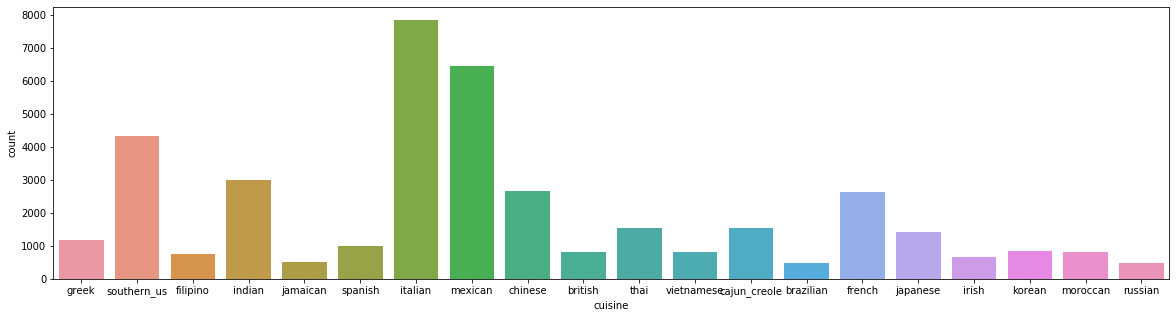

In [9]:
plt.figure(figsize=(20,5))
sns.countplot(train['cuisine'])


In [10]:
pip install wordCloud

Note: you may need to restart the kernel to use updated packages.


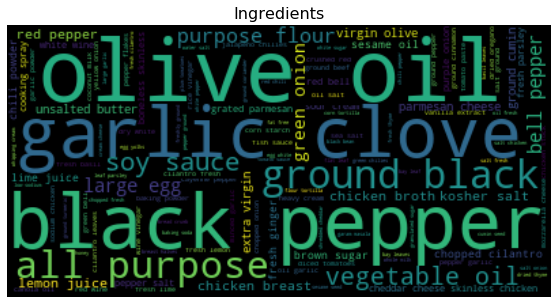

In [10]:
from wordcloud import WordCloud

def plot_wordcloud(text, title=None, max = 1000, size=(10,5), title_size=16):
    """plots wordcloud"""
    wordcloud = WordCloud(max_words=max).generate(text)
    plt.figure(figsize=size)
    plt.title(title, size=title_size)
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")

tok_list = sum([x for x in train.ingredients],[])
tok_list = ' '.join(tok_list)
plot_wordcloud(tok_list, title='Ingredients')

In [10]:
train['combined'] = train.ingredients.map(lambda x: ' '.join(x))
train = train[['cuisine','combined']]
train.head()

,cuisine,combined
0,greek,romaine lettuce black olives grape tomatoes ga...
1,southern_us,plain flour ground pepper salt tomatoes ground...
2,filipino,eggs pepper salt mayonaise cooking oil green c...
3,indian,water vegetable oil wheat salt
4,indian,black pepper shallots cornflour cayenne pepper...


In [18]:
pip install sklearn

  Using cached sklearn-0.0.tar.gz (1.1 kB)
  Created wheel for sklearn: filename=sklearn-0.0-py2.py3-none-any.whl size=1320 sha256=f32ad95b89be19ec6615817c109327b877fd7769c18d2a5637b0df29f32d596f
  Stored in directory: c:\users\rahul\appdata\local\pip\cache\wheels\46\ef\c3\157e41f5ee1372d1be90b09f74f82b10e391eaacca8f22d33e
Successfully built sklearn



In [38]:
clf=pipeline.Pipeline([
        ('tfidf_vectorizer', feature_extraction.text.TfidfVectorizer(lowercase=True)),
        ('kmeans_classifier',KMeans(init='k-means++', n_clusters=10, n_init=10))
    ])

In [17]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import cross_val_score

clf2 = MultinomialNB()
#scores = cross_val_score(clf, X, train.cuisine, cv=5)
#print('accuracy CV:',scores)

In [18]:
X_train,X_test,y_train,y_test=train_test_split(train.combined,train.cuisine, test_size=0.2)

In [39]:
clf.fit(X_train,y_train)

Pipeline(steps=[('tfidf_vectorizer', TfidfVectorizer()),
                ('kmeans_classifier', KMeans(n_clusters=10))])

In [40]:
y_pred=clf.predict(X_test)

In [23]:
test['combined'] = test.ingredients.map(lambda x: ' '.join(x))
test =test.drop(['ingredients'], axis=1)
test.head()

,id,combined
0,18009,baking powder eggs all-purpose flour raisins m...
1,28583,sugar egg yolks corn starch cream of tartar ba...
2,41580,sausage links fennel bulb fronds olive oil cub...
3,29752,meat cuts file powder smoked sausage okra shri...
4,35687,ground black pepper salt sausage casings leeks...


In [45]:
#y_train=train['cuisine']
#X_train=train['combined']

In [47]:
X_train,X_test,y_train,y_test=train_test_split(train.combined,train.cuisine, test_size=0.2)

In [41]:
clf.fit(train.combined,train.cuisine)

Pipeline(steps=[('tfidf_vectorizer', TfidfVectorizer()),
                ('kmeans_classifier', KMeans(n_clusters=10))])

In [42]:
pred=clf.predict(test.combined)

In [43]:
df=pd.DataFrame({'id':test.id,'cuisine':pred})

In [44]:
df.to_csv('submission3.csv', columns=['id','cuisine'],index=False)